In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [23]:
# Standardization process
from sklearn.preprocessing import StandardScaler
df = pd.read_excel("natural_gas.xlsx")

scaler = StandardScaler()
scaler.fit(df.iloc[:-12, :])

df = scaler.transform(df)


#df = pd.read_excel("natural_gas.xlsx")
#mu = df.iloc[: -12, :].mean()
#sigma = df.iloc[: -12, :].std()
#df = (df - mu)/ sigma

In [24]:

time_index = pd.date_range("2004-01-01",  periods = len(df), freq= "MS")
time_index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01'],
              dtype='datetime64[ns]', length=130, freq='MS')

In [25]:
df = pd.read_excel('natural_gas.xlsx')
df["year"] = time_index.year
df["month"] = time_index.month.astype(str)
df = pd.get_dummies(df, drop_first = True, dtype = "int")


In [26]:
import numpy as np
import pandas as pd

def make_data(data: np.ndarray, lag: int = 12):
    """
    Splits time series data into lagged features (X) and targets (y).

    Args:
        data (np.ndarray): The time series data.
        lag (int): The lag interval, default is 12.

    Returns:
        Tuple[np.ndarray, np.ndarray]: 
            - X (np.ndarray): The array containing lagged features.
            - y (np.ndarray): The array containing target values to predict.
    """
    X = []
    y = []

    # Iterate over the data to create lagged features and targets.
    # Convert lists to NumPy arrays and return them.
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])  
        y.append(data[i + lag])      
   
    return np.array(X), np.array(y)

# Assuming `df` is a Pandas DataFrame
df = pd.DataFrame({
    'column_1': np.random.rand(100),  # Example data
    'column_2': np.random.rand(100)
})

# Generate the lagged dataset using the first column of the DataFrame.
X, y = make_data(df.iloc[:, 0].values, lag=12)  # Convert the first column to a NumPy array

X = X[..., np.newaxis]

print(X.shape)  
print(y.shape)  


(88, 12, 1)
(88,)


In [27]:

X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

In [37]:
from sklearn.metrics import r2_score
# Create the model
mdl = models.Sequential()


# Add Dense layer to reduce to a single output
mdl.add(layers.LSTM(128, input_shape = X_train.shape[1:]))
mdl.add(layers.Dense(128, activation="relu"))  # Add some hidden layer(s) if necessary
mdl.add(layers.Dense(1, activation="linear"))  # Output layer with 1 unit

# Compile the model
mdl.compile(optimizer="adam", loss="mse", metrics=["mape"])

# Fit the model
mdl.fit(X_train, y_train, epochs=30, verbose=0)

# Predict and flatten the predictions if necessary
y_pred = mdl.predict(X_test)
y_pred = y_pred.ravel()

# Print shapes
print(y_pred.shape)  # This should now match the shape of y_test
print(r2_score(y_test, y_pred))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
(1,)
nan


C:\Users\Hefes\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


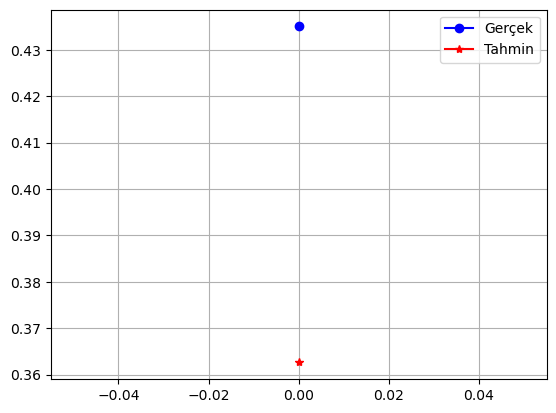

In [21]:
plt.plot(y_test, "-ob", label = "Gerçek")
plt.plot(y_pred, "-*r", label = "Tahmin")
plt.legend()
plt.grid()
